In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!kill -9 -1

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import numpy as np
import os
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam, RMSprop

In [5]:
# Load VGG16 model
model = VGG16(include_top=True, weights='imagenet')

553467904/553467096 [==============================] - 16s 0us/step


In [0]:
# Funtion to plot images
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    fig, axes = plt.subplots(3, 3)

    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i],
                      interpolation=interpolation)
            cls_true_name = class_names[cls_true[i]]
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                cls_pred_name = class_names[cls_pred[i]]
                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)
            ax.set_xlabel(xlabel)        
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [0]:
# Plot accuracy
def plot_training_history(history):
    acc = history.history['categorical_accuracy']
    loss = history.history['loss']

    val_acc = history.history['val_categorical_accuracy']
    val_loss = history.history['val_loss']
    
    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(loss, 'o', color='b', label='Training Loss')    
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.plot(val_loss, 'o', color='r', label='Test Loss')
    plt.title('Training and Test Accuracy')
    plt.legend()
    plt.show()

In [0]:
def predict(image_path):
    # Load and resize the image using PIL.
    img = PIL.Image.open(image_path)
    img_resized = img.resize(input_shape, PIL.Image.LANCZOS)

    # Plot the image.
    plt.imshow(img_resized)
    plt.show()
    img_array = np.expand_dims(np.array(img_resized), axis=0)
    pred = model.predict(img_array)    
    pred_decoded = decode_predictions(pred)[0]

    # Print the predictions.
    for code, name, score in pred_decoded:
        print("{0:>6.2%} : {1}".format(score, name))

In [0]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [0]:
def plot_example_errors(cls_pred):
    incorrect = (cls_pred != cls_test)
    image_paths = np.array(image_paths_test)[incorrect]

    # Load the first 9 images.
    images = load_images(image_paths=image_paths[0:9])    
    cls_pred = cls_pred[incorrect]
    cls_true = cls_test[incorrect]
    plot_images(images=images,
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
from sklearn.metrics import confusion_matrix
class_names = ['No DR','Mild DR','Moderate DR','Severe DR','Proliferative DR']
def print_confusion_matrix(cls_pred,acc):
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, np.trace(a),  generator_test.n)
    print("Confusion matrix:")
    
    print(cm)
    
    for i, class_name in enumerate(class_names):
        print("({0}) {1}".format(i, class_name))

In [0]:
def example_errors():
    generator_test.reset()    
    y_pred = new_model.predict_generator(generator_test,
                                         steps=steps_test)
    cls_pred = np.argmax(y_pred,axis=1)
    plot_example_errors(cls_pred)

In [0]:
# Path train and test data
train_dir = "drive/app/train_split/train/"
test_dir = "drive/app/train_split/test/"

In [15]:
# Input shape of model 
input_shape = model.layers[0].output_shape[1:3]
input_shape

(224, 224)

In [0]:
# Generator data rescale all images on 1/255
datagen_train = ImageDataGenerator(rescale=1./255)

In [0]:
datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generation of training data with batch size 150
batch_size = 150
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

In [ ]:
# Generation of testing data with batch size 150
generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

In [20]:
steps_test = generator_test.n / batch_size
steps_test

34.12

In [0]:
image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

In [22]:
cls_train = generator_train.classes
cls_test = generator_test.classes
num_classes = 5
class_names = list(generator_train.class_indices.keys())
class_names

['0', '1', '2', '3', '4']

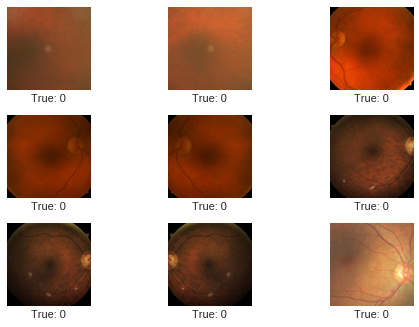

In [23]:
images = load_images(image_paths=image_paths_train[2000:2009])
cls_true = cls_train[2000:2009]
plot_images(images=images, cls_true=cls_true, smooth=True)

In [0]:
# Calculate weights of class to initialize to model 
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight(class_weight=None,
                                    classes=np.unique(cls_train),
                                    y=cls_train)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# Layer to transfer
transfer_layer = model.get_layer('block5_pool')

In [0]:
conv_model = Model(inputs=model.input,
                   outputs=transfer_layer.output)

new_model = Sequential()

new_model.add(conv_model)


new_model.add(Flatten())

new_model.add(Dense(1024, activation='relu'))

new_model.add(Dropout(0.5))

new_model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(lr=1e-5)

loss = 'categorical_crossentropy'

metrics = ['categorical_accuracy']

In [28]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 5125      
Total params: 40,410,949
Trainable params: 40,410,949
Non-trainable params: 0
_________________________________________________________________


In [29]:
conv_model.trainable = False
for layer in conv_model.layers:
    layer.trainable = False
print_layer_trainable()

False:	input_1
False:	block1_conv1
False:	block1_conv2
False:	block1_pool
False:	block2_conv1
False:	block2_conv2
False:	block2_pool
False:	block3_conv1
False:	block3_conv2
False:	block3_conv3
False:	block3_pool
False:	block4_conv1
False:	block4_conv2
False:	block4_conv3
False:	block4_pool
False:	block5_conv1
False:	block5_conv2
False:	block5_conv3
False:	block5_pool


In [0]:
# Compile model
new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [32]:
# Training model
epochs = 100
steps_per_epoch = 100
history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  class_weight=class_weight,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)

Epoch 1/100
100/100 [==============================] - 9379s 94s/step - loss: 1.2267 - categorical_accuracy: 0.5241 - val_loss: 1.0415 - val_categorical_accuracy: 0.6034
Epoch 2/100
100/100 [==============================] - 2536s 25s/step - loss: 1.0414 - categorical_accuracy: 0.5966 - val_loss: 0.9600 - val_categorical_accuracy: 0.6311
Epoch 3/100
100/100 [==============================] - 310s 3s/step - loss: 0.9791 - categorical_accuracy: 0.6225 - val_loss: 0.9286 - val_categorical_accuracy: 0.6473
Epoch 4/100
 23/100 [=====>........................] - ETA: 3:11 - loss: 0.9433 - categorical_accuracy: 0.6423100/100 [==============================] - 311s 3s/step - loss: 0.9383 - categorical_accuracy: 0.6332 - val_loss: 0.9068 - val_categorical_accuracy: 0.6512
Epoch 5/100
100/100 [==============================] - 311s 3s/step - loss: 0.8995 - categorical_accuracy: 0.6530 - val_loss: 0.8995 - val_categorical_accuracy: 0.6577
Epoch 6/100
100/100 [==============================] - 311

 36/100 [=========>....................] - ETA: 2:39 - loss: 0.0648 - categorical_accuracy: 0.9809100/100 [==============================] - 312s 3s/step - loss: 0.0565 - categorical_accuracy: 0.9856 - val_loss: 0.9508 - val_categorical_accuracy: 0.7618
Epoch 44/100
100/100 [==============================] - 314s 3s/step - loss: 0.0572 - categorical_accuracy: 0.9860 - val_loss: 0.9976 - val_categorical_accuracy: 0.7562
Epoch 45/100
100/100 [==============================] - 312s 3s/step - loss: 0.0572 - categorical_accuracy: 0.9857 - val_loss: 0.9843 - val_categorical_accuracy: 0.7517
Epoch 46/100
 36/100 [=========>....................] - ETA: 2:40 - loss: 0.0487 - categorical_accuracy: 0.9889100/100 [==============================] - 314s 3s/step - loss: 0.0551 - categorical_accuracy: 0.9858 - val_loss: 1.0432 - val_categorical_accuracy: 0.7423
Epoch 47/100
100/100 [==============================] - 312s 3s/step - loss: 0.0468 - categorical_accuracy: 0.9889 - val_loss: 0.9817 - val_c

 36/100 [=========>....................] - ETA: 2:40 - loss: 0.0253 - categorical_accuracy: 0.9928100/100 [==============================] - 314s 3s/step - loss: 0.0197 - categorical_accuracy: 0.9949 - val_loss: 1.1835 - val_categorical_accuracy: 0.7491
Epoch 86/100
100/100 [==============================] - 312s 3s/step - loss: 0.0163 - categorical_accuracy: 0.9961 - val_loss: 1.3416 - val_categorical_accuracy: 0.7620
Epoch 87/100
100/100 [==============================] - 312s 3s/step - loss: 0.0128 - categorical_accuracy: 0.9974 - val_loss: 1.2366 - val_categorical_accuracy: 0.7620
Epoch 88/100
 36/100 [=========>....................] - ETA: 2:39 - loss: 0.0133 - categorical_accuracy: 0.9972100/100 [==============================] - 312s 3s/step - loss: 0.0140 - categorical_accuracy: 0.9969 - val_loss: 1.3578 - val_categorical_accuracy: 0.7524
Epoch 89/100
100/100 [==============================] - 314s 3s/step - loss: 0.0192 - categorical_accuracy: 0.9950 - val_loss: 1.2001 - val_c

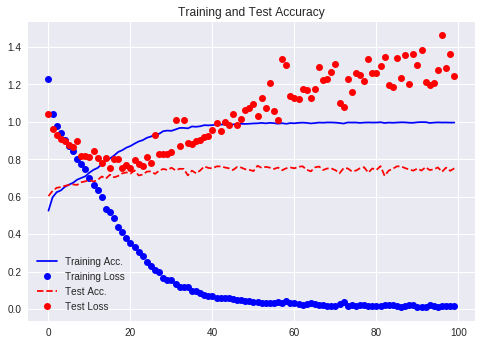

In [33]:
plot_training_history(history)

In [0]:
result = new_model.evaluate_generator(generator_test, steps=steps_test)

In [35]:
print("Test classification accuracy: {0:.2%}".format(result[1]))

Test classification accuracy: 75.15%


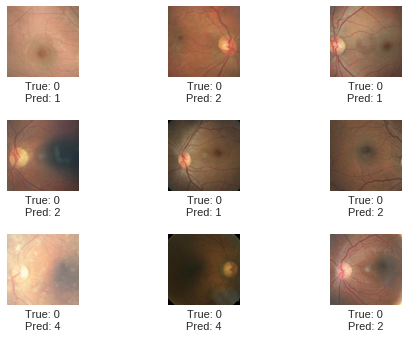

In [36]:
example_errors()

In [37]:
 print_confusion_matrix(cls_pred,result[1])

Accuracy on Test-Set: 75.1% (7627 / 10149)
Confusion matrix:
[[4509   62  248   15   26]
 [ 334  513  482   20    5]
 [ 621  185 1984   75  140]
 [ 125   27   93  246   23]
 [   2    0    4    9  375]]
(0) No DR
(1) Mild DR
(2) Moderate DR
(3) Severe DR
(4) Proliferative DR
